In [1]:
import numpy as np
import pandas as pd

# Задано
p = 8
n = 30
x0 = p
xn = p + 10
h = (xn - x0) / n

# Табуляція
x = np.linspace(x0, xn, n + 1)
y = (1 / p) * np.sin(x + p)

# Зберігаю у файл
data = pd.DataFrame({'x': x, 'f(x)': y})
data.to_csv('input.txt', index=False)

# Вивід
data.head()


,x,f(x)
0,8.000000,-0.035988
1,8.333333,-0.073175
2,8.666667,-0.102306
3,9.000000,-0.120175
4,9.333333,-0.124814


In [2]:
# Функція побудови системи рівнянь для МНК
def build_system(x, y, m):
    A = np.zeros((m+1, m+1))
    B = np.zeros(m+1)
    for i in range(m+1):
        for j in range(m+1):
            A[i][j] = np.sum(x**(i + j))
        B[i] = np.sum(y * x**i)
    return A, B

# Розв'язання методом Гауса
def gaussian_elimination(A, B):
    return np.linalg.solve(A, B)

# Обчислення апроксимаційного значення
def phi(x, coeffs):
    return sum(c * x**i for i, c in enumerate(coeffs))

# Для прикладу: m = 3
m = 3
A, B = build_system(x, y, m)
C = gaussian_elimination(A, B)

# Обчислення похибки
y_appr = np.array([phi(xi, C) for xi in x])
errors = np.abs(y - y_appr)

# Вивід
pd.DataFrame({'x': x, 'f(x)': y, 'phi(x)': y_appr, 'error': errors}).head()


,x,f(x),phi(x),error
0,8.000000,-0.035988,-0.179992,0.144004
1,8.333333,-0.073175,-0.133292,0.060117
2,8.666667,-0.102306,-0.093327,0.008979
3,9.000000,-0.120175,-0.059665,0.060510
4,9.333333,-0.124814,-0.031875,0.092939


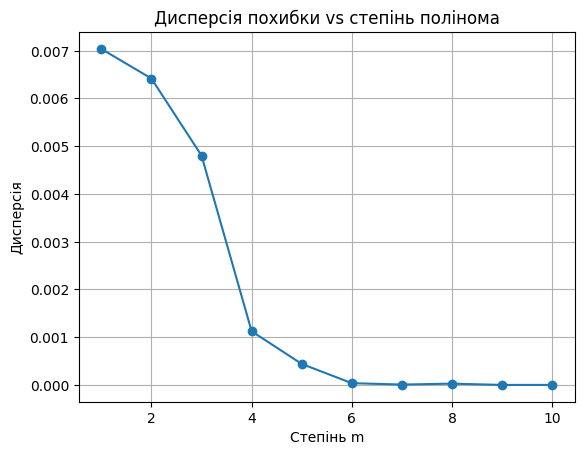

Оптимальний степінь m = 9


In [3]:
import matplotlib.pyplot as plt

degrees = range(1, 11)
variances = []

for m in degrees:
    A, B = build_system(x, y, m)
    C = gaussian_elimination(A, B)
    y_appr = np.array([phi(xi, C) for xi in x])
    errors = y - y_appr
    dispersion = np.mean(errors**2)
    variances.append(dispersion)

# Побудова графіка
plt.plot(degrees, variances, marker='o')
plt.title('Дисперсія похибки vs степінь полінома')
plt.xlabel('Степінь m')
plt.ylabel('Дисперсія')
plt.grid(True)
plt.show()

# Знаходження оптимального m
m_optimal = degrees[np.argmin(variances)]
print("Оптимальний степінь m =", m_optimal)


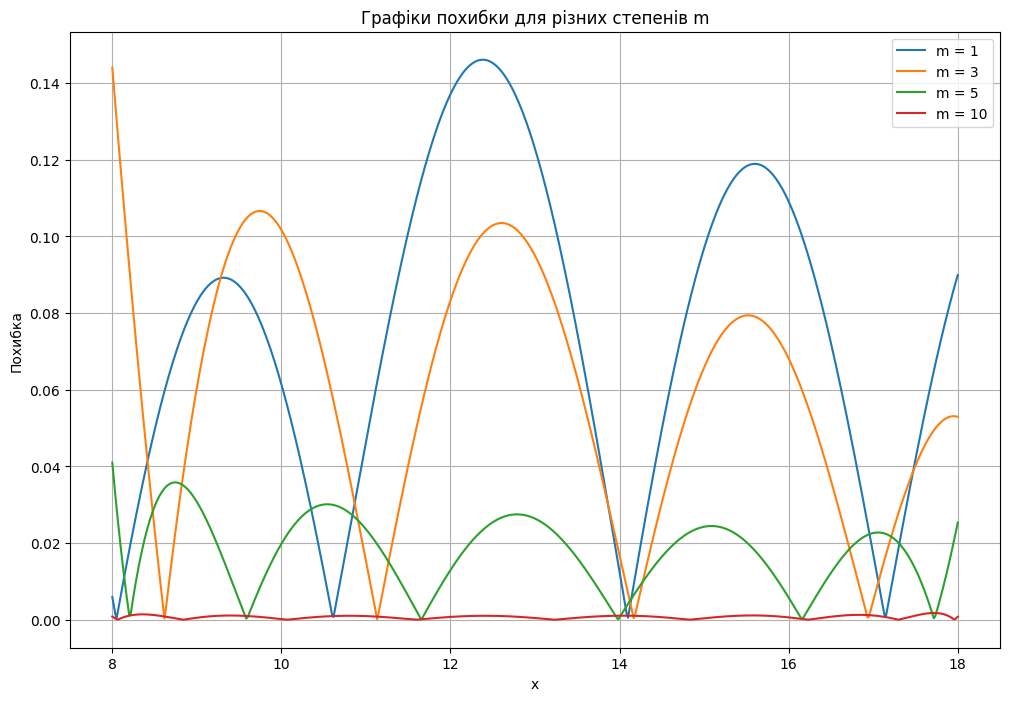

In [4]:
x_dense = np.linspace(x0, xn, 20 * n + 1)
true_y_dense = (1 / p) * np.sin(x_dense + p)

plt.figure(figsize=(12, 8))
for m in [1, 3, 5, 10]:
    A, B = build_system(x, y, m)
    C = gaussian_elimination(A, B)
    y_appr_dense = np.array([phi(xi, C) for xi in x_dense])
    err_dense = np.abs(true_y_dense - y_appr_dense)
    plt.plot(x_dense, err_dense, label=f'm = {m}')

plt.title('Графіки похибки для різних степенів m')
plt.xlabel('x')
plt.ylabel('Похибка')
plt.legend()
plt.grid(True)
plt.show()
